In [21]:
import statsmodels  # for version check
import statsmodels.api as sm  # for modeling tools
import statsmodels.formula.api as smf  # for formula-based modeling
from scipy.stats import ttest_ind  # for T test purpose
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = sns.load_dataset('tips')

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

print(statsmodels.__version__)  # this will print the version

0.14.2


In [22]:
import os
print(os.getcwd())

C:\Users\Rinzi\DSI 5050 (TESU)


In [23]:
import pandas as pd

original_df = pd.read_csv(r"C:\Users\Rinzi\OneDrive\Desktop\Grad School\Python DSI5050\tips.csv") # raw, untouched data
df = original_df.copy() # is working copy


## Checking for the outlier

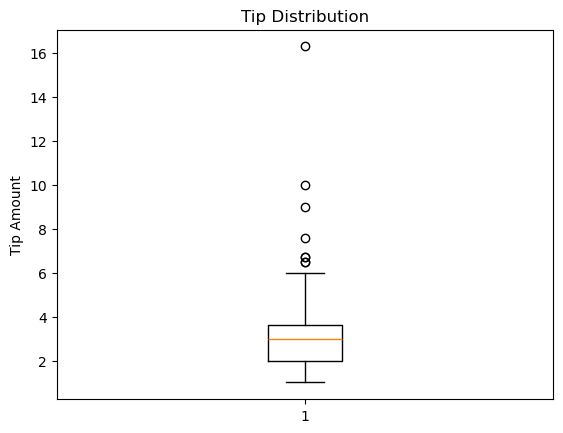

In [24]:
import matplotlib.pyplot as plt

plt.boxplot(original_df['tip'])
plt.title('Tip Distribution')
plt.ylabel('Tip Amount')
plt.show()

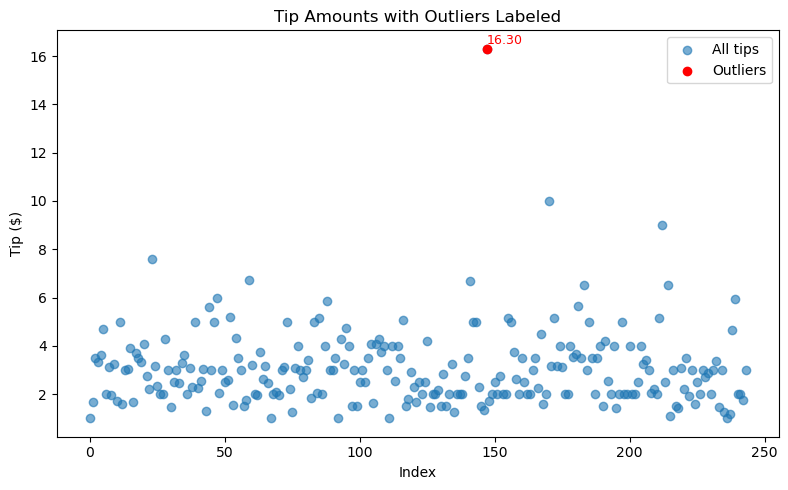

In [25]:


# Define outliers (simple rule: tip > 10)
outliers = original_df[original_df["tip"] > 10]

# Plot all tips
plt.figure(figsize=(8, 5))
plt.scatter(original_df.index, original_df["tip"], label="All tips", alpha=0.6)

# Highlight and label outliers
plt.scatter(outliers.index, outliers["tip"], color="red", label="Outliers")
for i, row in outliers.iterrows():
    plt.text(i, row["tip"] + 0.2, f"{row['tip']:.2f}", color="red", fontsize=9)

# Final touches
plt.title("Tip Amounts with Outliers Labeled")
plt.xlabel("Index")
plt.ylabel("Tip ($)")
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [27]:
df['total_cost'] = df['total_bill'] + df['tip']

In [28]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_cost
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20


In [29]:
df.isna().sum().sum()

0

In [30]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
total_cost    0
dtype: int64

In [31]:
df.isna().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    0
241    0
242    0
243    0
Length: 244, dtype: int64

# **Checking for Duplicates**

In [32]:
df.duplicated().sum()

1

In [33]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size,total_cost
202,13.0,2.0,Female,Yes,Thur,Lunch,2,15.0


Index 199 and 203 have been found to contain the same information so therefore it is redundent
So the redundency will be removed through the drop() method


In [34]:
df = df.drop_duplicates()

In [35]:
df.duplicated().sum()

0

# **Checking for null values**

In [36]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
total_cost    0
dtype: int64

In [37]:
print(df.shape)

(243, 8)


## Tip rate by Group size

In [38]:
small_group = df[df['size']<=2]
tip_rate_small = small_group['tip'].sum() / small_group['total_bill'].sum()*100
print(f'Small group tip percentage is {tip_rate_small:.2f}%')

Small group tip percentage is 16.32%


In [39]:
large_group = df[df['size']>2]
tip_rate_large = large_group['tip'].sum() /large_group['total_bill'].sum()*100
print(f'Large group tip percentage is {tip_rate_large:.2f}%')

Large group tip percentage is 14.46%


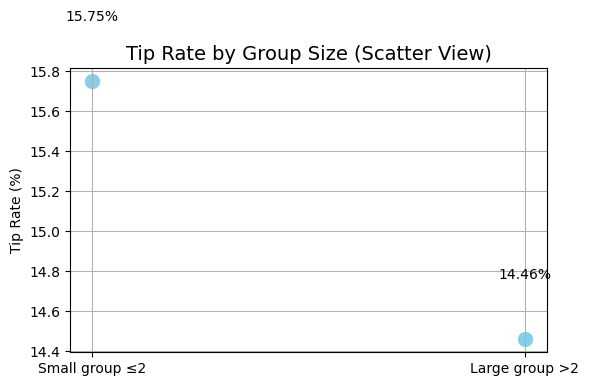

In [40]:
group_labels = ['Small group ≤2', 'Large group >2']
tip_rates = [15.75, 14.46]
x_values = [1, 2]  # Numeric x-axis positions
plt.figure(figsize=(6, 4))
plt.scatter(x_values, tip_rates, color='skyblue', s=100)
for i, rate in enumerate(tip_rates):
    plt.text(x_values[i], rate + 0.3, f'{rate:.2f}%', ha='center')
plt.xticks(x_values, group_labels)
plt.title('Tip Rate by Group Size (Scatter View)', fontsize=14)
plt.ylabel('Tip Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Created tip_pct column

In [41]:
df['tip_pct'] = df['tip'] / df['total_bill']


In [42]:
df['tip_pct']

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Name: tip_pct, Length: 243, dtype: float64

In [43]:
maletip = df[df['sex'] == 'Male']
tip_rate_male = (maletip['tip'].sum()/maletip['total_bill'].sum()* 100)
print(f'Male Tip Rate: {tip_rate_male:.2f}%')
femtip = df[df['sex'] == 'Female']
tip_rate_female = (femtip['tip'].sum()/femtip['total_bill'].sum()*100)
print(f'Female Tip Rate: {tip_rate_female:.2f}%')

Male Tip Rate: 14.89%
Female Tip Rate: 16.64%


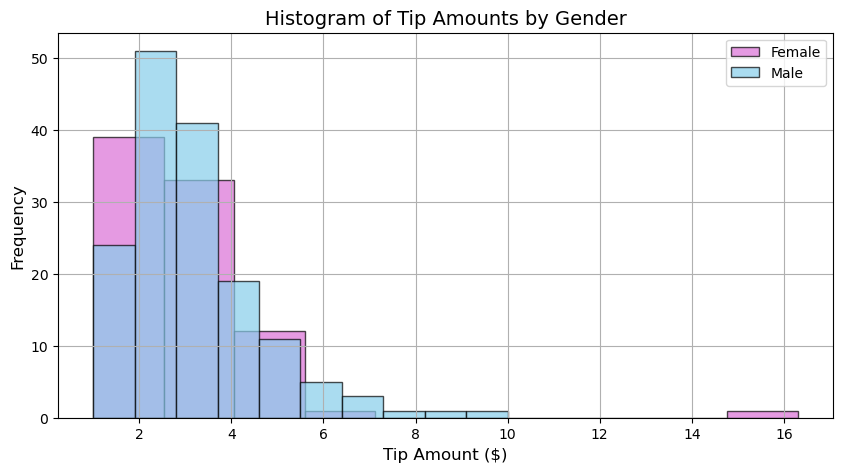

In [44]:
plt.figure(figsize=(10, 5))
plt.hist(femtip['tip'], bins=10, alpha=0.7, color='orchid', edgecolor='black', label='Female')
plt.hist(maletip['tip'], bins=10, alpha=0.7, color='skyblue', edgecolor='black', label='Male')
plt.title('Histogram of Tip Amounts by Gender', fontsize=14)
plt.xlabel('Tip Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## Lunch tip for raw data (df)

In [45]:
raw_lun_tip = df[df['time'] == 'Lunch']
raw_ltip_pct = raw_lun_tip['tip'].sum()/ raw_lun_tip['total_bill'].sum()*100
print(f'Lunch tip rate for raw data is: {raw_ltip_pct:.2f}%')


Lunch tip rate for raw data is: 17.17%


## Dinner tip for raw data  (df)

In [46]:
raw_din_tip = df[df['time'] == 'Dinner']
raw_dtip_pct = raw_din_tip['tip'].sum()/raw_din_tip['total_bill'].sum()*100
print(f'Dinner tip rate for raw data is: {raw_dtip_pct:.2f}%')

Dinner tip rate for raw data is: 14.92%


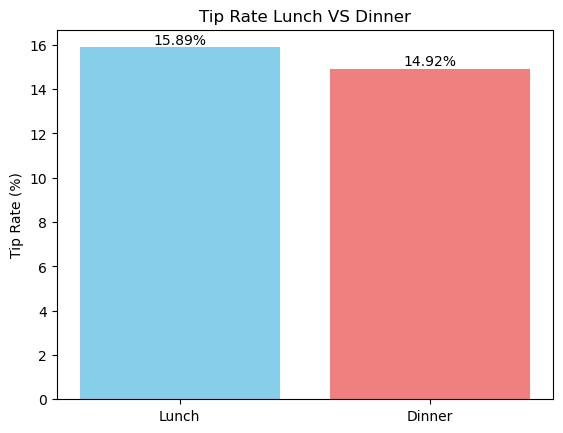

In [47]:
labels = ['Lunch', 'Dinner']
tip_rates = [15.89, 14.92]

plt.bar(labels, tip_rates)
plt.title('Tip Rate Lunch VS Dinner')
plt.ylabel('Tip Rate (%)')
bars = plt.bar(labels, tip_rates, color=['skyblue', 'lightcoral'])

plt.bar_label(bars, fmt='%.2f%%', label_type='edge')

plt.show()

## # Tip Rate for Smoker vs Non Smoker

In [48]:
smoker = df[df['smoker'] == 'Yes']
non_smoker =df[df['smoker'] == 'No']


In [49]:
smoker_tip_rate = smoker['tip'].sum()/smoker['total_bill'].sum() * 100
print(f'smoker tip rate is: {smoker_tip_rate:.2f}%')

smoker tip rate is: 14.49%


In [50]:
non_smoker_tip_rate = non_smoker['tip'].sum()/ non_smoker['total_bill'].sum()*100
print(f'Non smoker tip rate is: {non_smoker_tip_rate:.2f}%')

Non smoker tip rate is: 16.10%


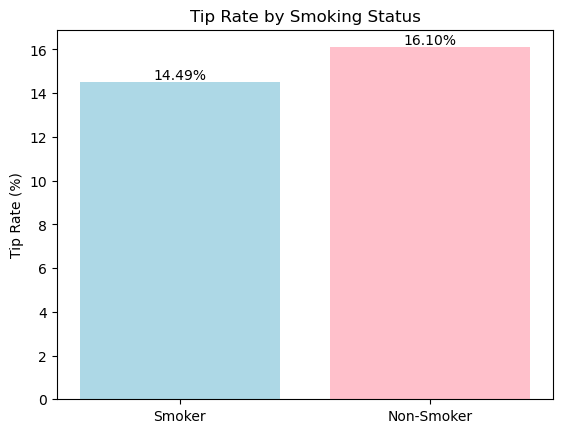

In [51]:
labels = ['Smoker', 'Non-Smoker']
tip_rates = [14.49, 16.10]

plt.bar(labels, tip_rates)
plt.title('Tip Rate by Smoking Status')
plt.ylabel('Tip Rate (%)')
bars = plt.bar(labels, tip_rates ,color= ['lightblue','pink'])
plt.bar_label(bars,fmt = '%.2f%%',label_type = 'edge')
plt.show()

## Mean value for Smoker VS Non Smoker 

In [52]:
df.groupby('smoker')['tip_pct'].mean()


smoker
No     0.167513
Yes    0.163298
Name: tip_pct, dtype: float64

In [53]:
smoked = df[df['smoker'] == 'Yes']
Non_smoked = df[df['smoker']=='No']
smoked.head()

,total_bill,tip,sex,smoker,day,time,size,total_cost,tip_pct
56,38.01,3.00,Male,Yes,Sat,Dinner,4,41.01,0.078927
58,11.24,1.76,Male,Yes,Sat,Dinner,2,13.00,0.156584
60,20.29,3.21,Male,Yes,Sat,Dinner,2,23.50,0.158206
61,13.81,2.00,Male,Yes,Sat,Dinner,2,15.81,0.144823
62,11.02,1.98,Male,Yes,Sat,Dinner,2,13.00,0.179673


In [54]:
Non_smoked.head()

,total_bill,tip,sex,smoker,day,time,size,total_cost,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20,0.146808


## Checking correlation between size and tip based on original dataframe

In [55]:
corr_size_tip = original_df['size'].corr(original_df['tip'])
print(f"Correlation between party size and tip: {corr_size_tip:.2f}")

Correlation between party size and tip: 0.40


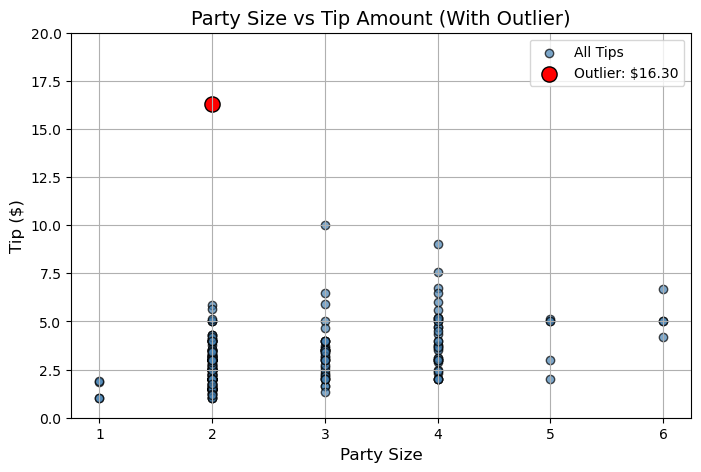

In [56]:
plt.figure(figsize=(8, 5))
plt.scatter(original_df['size'], original_df['tip'], alpha=0.7, color='steelblue', edgecolors='black', label='All Tips')
outlier = original_df[original_df['tip'] == 16.3]
if not outlier.empty:
    plt.scatter(outlier['size'], outlier['tip'], color='red', s=120, edgecolors='black', label='Outlier: $16.30')
plt.title('Party Size vs Tip Amount (With Outlier)', fontsize=14)
plt.xlabel('Party Size', fontsize=12)
plt.ylabel('Tip ($)', fontsize=12)
plt.ylim(0, 20)  # Expand y-axis to make outlier more visible
plt.grid(True)
plt.legend()
plt.show()

## Checking correlation between total_bill and tip based on original dataframe

In [57]:
corr_bill_tip = original_df['total_bill'].corr(original_df['tip'])
print(f"Correlation between party total bill and tip: {corr_bill_tip:.2f}")

Correlation between party total bill and tip: 0.54


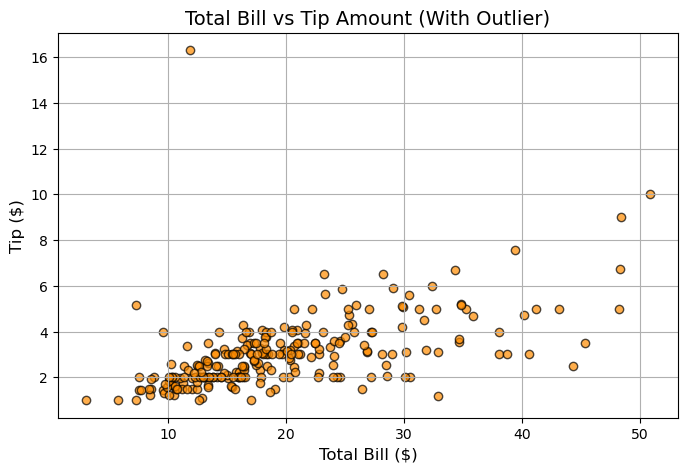

In [58]:
plt.figure(figsize=(8, 5))
plt.scatter(original_df['total_bill'], original_df['tip'], alpha=0.7, color='darkorange', edgecolors='black')
plt.title('Total Bill vs Tip Amount (With Outlier)', fontsize=14)
plt.xlabel('Total Bill ($)', fontsize=12)
plt.ylabel('Tip ($)', fontsize=12)
plt.grid(True)
plt.show()

# **Maximum & Minimum Cost of the meal excluding the tips (total_bill)** 

In [59]:
print("Minimum meal cost:", df['total_bill'].min())
print("Maximum meal cost:", df['total_bill'].max())

Minimum meal cost: 3.07
Maximum meal cost: 50.81


# **Created a new column total_cost that includes the tip**
# **Maximum & Minimum total_cost, Average total_cost of the meal**


In [60]:
df['total_cost'] = df['total_bill'] + df['tip']
df['bill_pct'] = ((df['total_bill'] / df['total_cost']) * 100).round(2).astype(str) +'%'
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_cost,tip_pct,bill_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00,0.059447,94.39%
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00,0.160542,86.17%
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51,0.166587,85.72%
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99,0.139780,87.74%
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20,0.146808,87.2%


In [61]:
#print(df[df['total_cost'] == df['total_bill'] + df['tip']])

In [62]:
print('Maximum Total Cost of the meal:', df['total_cost'].max())
print('Minimum Total Cost of the meal:', df['total_cost'].min())
print("Average total cost of the meal:", df['total_cost'].mean())

Maximum Total Cost of the meal: 60.81
Minimum Total Cost of the meal: 4.07
Average total cost of the meal: 22.876625514403294


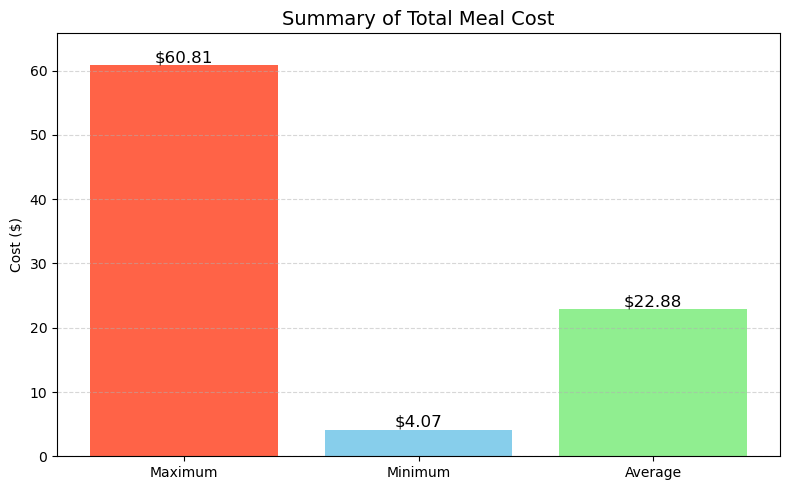

In [63]:

# Prepare values
max_cost = df['total_cost'].max()
min_cost = df['total_cost'].min()
avg_cost = df['total_cost'].mean()

# Create bar chart
plt.figure(figsize=(8, 5))
plt.title('Summary of Total Meal Cost', fontsize=14)

labels = ['Maximum', 'Minimum', 'Average']
values = [max_cost, min_cost, avg_cost]
colors = ['tomato', 'skyblue', 'lightgreen']

plt.bar(labels, values, color=colors)

# Annotate bars (no loop)
plt.text(0, values[0] + 0.5, f"${values[0]:.2f}", ha='center', fontsize=12)
plt.text(1, values[1] + 0.5, f"${values[1]:.2f}", ha='center', fontsize=12)
plt.text(2, values[2] + 0.5, f"${values[2]:.2f}", ha='center', fontsize=12)

plt.ylabel('Cost ($)')
plt.ylim(0, max_cost + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Created sub filter lunch_time to filter meal by Dinner

In [64]:
dinner_time = df[df['time'] == 'Dinner']
dinner_time.head()

,total_bill,tip,sex,smoker,day,time,size,total_cost,tip_pct,bill_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00,0.059447,94.39%
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00,0.160542,86.17%
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51,0.166587,85.72%
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99,0.139780,87.74%
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20,0.146808,87.2%


# Maximum , Minimum & Average Bill as per dinner

In [65]:
print(f'Maximum dinner bill: {dinner_time['total_bill'].max():.2f}')
print(f'Minimum dinner bill: {dinner_time['total_bill'].min():.2f}')
print(f'Mean dinner bill: {dinner_time['total_bill'].mean():.2f}')

Maximum dinner bill: 50.81
Minimum dinner bill: 3.07
Mean dinner bill: 20.80


## Maximum , Minimum & Average Tip as per dinner

In [66]:
print(f'Maximum Average Tip: {dinner_time['tip'].max():.2f}')
print(f'Minimum Average Tip: {dinner_time['tip'].min():.2f}')

Maximum Average Tip: 10.00
Minimum Average Tip: 1.00


In [67]:
dinner_tip_per = dinner_time['tip'].sum()/dinner_time['total_bill'].sum() *100
print(f'Dinner Tip percentage : {dinner_tip_per:.2f}%')

Dinner Tip percentage : 14.92%


In [68]:
dinner_smoke = dinner_time[dinner_time['smoker'] == 'Yes']
dinner_smoke.head()

,total_bill,tip,sex,smoker,day,time,size,total_cost,tip_pct,bill_pct
56,38.01,3.00,Male,Yes,Sat,Dinner,4,41.01,0.078927,92.68%
58,11.24,1.76,Male,Yes,Sat,Dinner,2,13.00,0.156584,86.46%
60,20.29,3.21,Male,Yes,Sat,Dinner,2,23.50,0.158206,86.34%
61,13.81,2.00,Male,Yes,Sat,Dinner,2,15.81,0.144823,87.35%
62,11.02,1.98,Male,Yes,Sat,Dinner,2,13.00,0.179673,84.77%


In [69]:
dinner_smoke_tiprate = dinner_smoke['tip'].sum( )/dinner_smoke['total_bill'].sum()*100
print(f'Tip percentage by smoker during dinner {dinner_smoke_tiprate:.2f}%')

Tip percentage by smoker during dinner 14.03%


In [70]:
dinner_no_smoke = dinner_time[dinner_time['smoker'] == 'No']
dinner_no_smoke.head()

,total_bill,tip,sex,smoker,day,time,size,total_cost,tip_pct,bill_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00,0.059447,94.39%
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00,0.160542,86.17%
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51,0.166587,85.72%
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99,0.139780,87.74%
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20,0.146808,87.2%


In [71]:
dinner_nosmoke_tiprate = dinner_no_smoke['tip'].sum()/dinner_time['total_bill'].sum()*100
print(f'Tip percentage by non smoker during dinner {dinner_nosmoke_tiprate:.2f}%')

Tip percentage by non smoker during dinner 9.06%


<h2 style="color: teal;">Created sub filter lunch_time to filter meal by lunch</h2>



In [72]:
lunch_time = df[df['time'] == 'Lunch']
lunch_time.head()


,total_bill,tip,sex,smoker,day,time,size,total_cost,tip_pct,bill_pct
77,27.20,4.00,Male,No,Thur,Lunch,4,31.20,0.147059,87.18%
78,22.76,3.00,Male,No,Thur,Lunch,2,25.76,0.131810,88.35%
79,17.29,2.71,Male,No,Thur,Lunch,2,20.00,0.156738,86.45%
80,19.44,3.00,Male,Yes,Thur,Lunch,2,22.44,0.154321,86.63%
81,16.66,3.40,Male,No,Thur,Lunch,2,20.06,0.204082,83.05%


<h2 style="color: teal; font-size:15px">Maximum , Minimum & Average Bill as per lunch</h2>


In [73]:
print('Maximum lunch bill:',lunch_time['total_bill'].max())
print('Minimum lunch bill:',lunch_time['total_bill'].min())
print('Mean lunch Bill:',lunch_time['total_bill'].mean())

Maximum lunch bill: 43.11
Minimum lunch bill: 7.51
Mean lunch Bill: 17.23089552238806


<h2 style="color: teal; font-size:15px">Maximum & Minimum & Average Tip as per lunch</h2>


In [74]:
print('Maixmum lunch tip:',lunch_time['tip'].max())
print('Minimum lunch tip:',lunch_time['tip'].min())

Maixmum lunch tip: 16.3
Minimum lunch tip: 1.25


In [75]:
lunch_tip_per = lunch_time['tip'].sum()/lunch_time['total_bill'].sum()*100
print(f'lunch tip percentage: {lunch_tip_per:.2f}%')

lunch tip percentage: 17.17%


## Tip based on smoker vs non smoker for lunch

In [76]:
lunch_time.groupby(['smoker','sex'])[['tip']].mean()

tip
smoker sex             
No     Female  3.046400
       Male    2.941500
Yes    Female  2.990000
       Male    2.790769

## Smoker Tip Percentage during Lunch

In [77]:
lunch_smoke = lunch_time[lunch_time['smoker'] == 'Yes']
lunch_smoke.head()

,total_bill,tip,sex,smoker,day,time,size,total_cost,tip_pct,bill_pct
80,19.44,3.00,Male,Yes,Thur,Lunch,2,22.44,0.154321,86.63%
83,32.68,5.00,Male,Yes,Thur,Lunch,2,37.68,0.152999,86.73%
138,16.00,2.00,Male,Yes,Thur,Lunch,2,18.00,0.125000,88.89%
191,19.81,4.19,Female,Yes,Thur,Lunch,2,24.00,0.211509,82.54%
192,28.44,2.56,Male,Yes,Thur,Lunch,2,31.00,0.090014,91.74%


In [78]:
lunch_smoke_tiprate = lunch_smoke['tip'].sum()/lunch_smoke['total_bill'].sum()*100
print(f'Tip percentage by smoker during lunch: {lunch_smoke_tiprate:.2f}%')

Tip percentage by smoker during lunch: 16.32%


In [79]:
lunch_nosmoke = lunch_time[lunch_time['smoker'] == 'No']
lunch_nonsmoke_tiprate = lunch_nosmoke['tip'].sum()/lunch_nosmoke['total_bill'].sum()*100


In [80]:
print(f'Tip percentage by non smoker during lunch: {lunch_nonsmoke_tiprate:.2f}%')

Tip percentage by non smoker during lunch: 17.59%


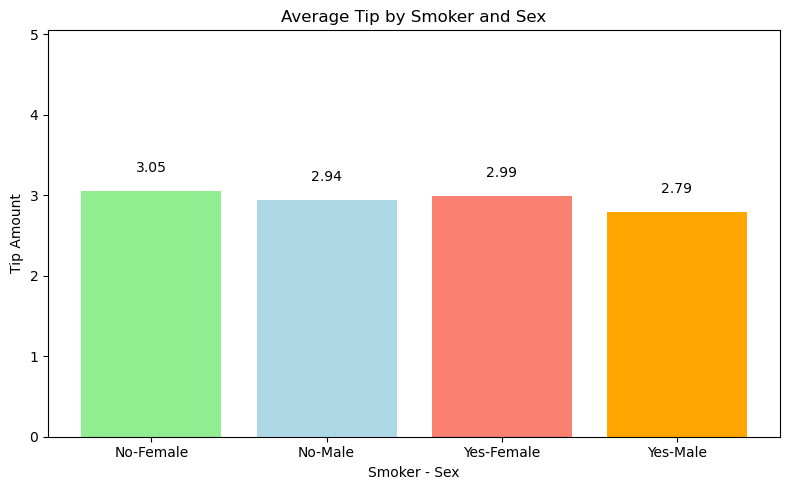

In [81]:

# Step 1: Group and calculate the average
grouped_means = lunch_time.groupby(['smoker', 'sex'])['tip'].mean()

# Step 2: Create the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(
    ['No-Female', 'No-Male', 'Yes-Female', 'Yes-Male'],  # X-axis labels
    [
        grouped_means.loc[('No', 'Female')],
        grouped_means.loc[('No', 'Male')],
        grouped_means.loc[('Yes', 'Female')],
        grouped_means.loc[('Yes', 'Male')]
    ],
    color=['lightgreen', 'lightblue', 'salmon', 'orange']  # Bar colors
)

# Step 3: Add value labels above each bar
plt.text(0, grouped_means.loc[('No', 'Female')] + 0.2, f'{grouped_means.loc[("No", "Female")]:.2f}', ha='center', va='bottom', fontsize=10)
plt.text(1, grouped_means.loc[('No', 'Male')] + 0.2, f'{grouped_means.loc[("No", "Male")]:.2f}', ha='center', va='bottom', fontsize=10)
plt.text(2, grouped_means.loc[('Yes', 'Female')] + 0.2, f'{grouped_means.loc[("Yes", "Female")]:.2f}', ha='center', va='bottom', fontsize=10)
plt.text(3, grouped_means.loc[('Yes', 'Male')] + 0.2, f'{grouped_means.loc[("Yes", "Male")]:.2f}', ha='center', va='bottom', fontsize=10)

# Step 4: Add chart title and axis labels
plt.title('Average Tip by Smoker and Sex')
plt.ylabel('Tip Amount')
plt.xlabel('Smoker - Sex')

# Step 5: Adjust y-axis to make room for labels
plt.ylim(0, max(grouped_means.values) + 2)

# Step 6: Final layout and display
plt.tight_layout()
plt.show()


## **Created a sub filter (M_lunch_time) to categorize sex by male**

In [82]:
M_lunch_time = df[df['sex'] == 'Male']
M_lunch_time.head()

,total_bill,tip,sex,smoker,day,time,size,total_cost,tip_pct,bill_pct
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00,0.160542,86.17%
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51,0.166587,85.72%
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99,0.139780,87.74%
5,25.29,4.71,Male,No,Sun,Dinner,4,30.00,0.186240,84.3%
6,8.77,2.00,Male,No,Sun,Dinner,2,10.77,0.228050,81.43%


## ** Maximum, Minimum and Average tip % for lunch as per male server**

In [83]:
M_lunch_time['tip'].max(),M_lunch_time['tip'].min(),M_lunch_time['tip'].sum()/M_lunch_time['total_bill'].sum()*100

(10.0, 1.0, 14.893976332741754)

## **Created a sub filter (F_lunch_time) to categorize sex by Female**

In [84]:
F_lunch_time= lunch_time[lunch_time['sex'] == 'Female']
F_lunch_time.head()


,total_bill,tip,sex,smoker,day,time,size,total_cost,tip_pct,bill_pct
82,10.07,1.83,Female,No,Thur,Lunch,1,11.90,0.181728,84.62%
85,34.83,5.17,Female,No,Thur,Lunch,4,40.00,0.148435,87.07%
117,10.65,1.50,Female,No,Thur,Lunch,2,12.15,0.140845,87.65%
118,12.43,1.80,Female,No,Thur,Lunch,2,14.23,0.144811,87.35%
119,24.08,2.92,Female,No,Thur,Lunch,4,27.00,0.121262,89.19%


**Maximum, Minimum and Average tip % for lunch as per Female server**

In [85]:
print(F_lunch_time['tip'].max()), 
print(F_lunch_time['tip'].min()),
print(F_lunch_time['tip'].sum() / F_lunch_time['total_bill'].sum()*100)

16.3
1.25
18.44257161772863


# **Created sub filter Dinner_time to filter meal by Dinner**


In [86]:
dinner_time = df[df['time'] == 'Dinner']
dinner_time.head()

,total_bill,tip,sex,smoker,day,time,size,total_cost,tip_pct,bill_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00,0.059447,94.39%
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00,0.160542,86.17%
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51,0.166587,85.72%
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99,0.139780,87.74%
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20,0.146808,87.2%


## Maximum & Minimum total cost and Average total cost as per Dinner

In [87]:
print('Maximum Total Cost of the meal:', dinner_time['total_cost'].max())
print('Minimum Total Cost of the meal:', dinner_time['total_cost'].min())
print(f'Average Total cost of the meal:{dinner_time['total_cost'].mean():.2f}%')


Maximum Total Cost of the meal: 60.81
Minimum Total Cost of the meal: 4.07
Average Total cost of the meal:23.90%


## Created sub_filter (M_dinner_time) to categorize Male by Dinner

In [88]:
M_dinner_time = dinner_time[dinner_time['sex'] == 'Male']
M_dinner_time.head()

,total_bill,tip,sex,smoker,day,time,size,total_cost,tip_pct,bill_pct
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00,0.160542,86.17%
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51,0.166587,85.72%
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99,0.139780,87.74%
5,25.29,4.71,Male,No,Sun,Dinner,4,30.00,0.186240,84.3%
6,8.77,2.00,Male,No,Sun,Dinner,2,10.77,0.228050,81.43%


In [89]:
print('Maximum Dinner Tip for Male Server:', M_dinner_time['tip'].max())
print('Minimum Dinner Tip for Male Server:', M_dinner_time['tip'].min())
print('Average Dinner Tip for Male Server:', M_dinner_time['tip'].sum() / M_dinner_time['total_bill'].sum() * 100)

Maximum Dinner Tip for Male Server: 10.0
Minimum Dinner Tip for Male Server: 1.0
Average Dinner Tip for Male Server: 14.653429630019312


## Created sub_filter (F_dinner_time) to categorize Female by Dinner

In [90]:
F_dinner_time = dinner_time[dinner_time['sex'] == 'Female']
F_dinner_time.head()

,total_bill,tip,sex,smoker,day,time,size,total_cost,tip_pct,bill_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00,0.059447,94.39%
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20,0.146808,87.2%
11,35.26,5.00,Female,No,Sun,Dinner,4,40.26,0.141804,87.58%
14,14.83,3.02,Female,No,Sun,Dinner,2,17.85,0.203641,83.08%
16,10.33,1.67,Female,No,Sun,Dinner,3,12.00,0.161665,86.08%


In [91]:
print('Maximum Dinner Tip for Femal Server:',F_dinner_time['tip'].max())
print('Minimum Dinner Tip for Female Server:', F_dinner_time['tip'].min())
print('Average Dinner Tip for Femal Server:', F_dinner_time['tip'].sum() / F_dinner_time['total_bill'].sum() * 100)

Maximum Dinner Tip for Femal Server: 6.5
Minimum Dinner Tip for Female Server: 1.0
Average Dinner Tip for Femal Server: 15.625375345317691


In [92]:
df.groupby(['time','sex'])['tip'].mean()

time    sex   
Dinner  Female    3.002115
        Male      3.144839
Lunch   Female    3.031471
        Male      2.882121
Name: tip, dtype: float64

## Regression analysis with raw data df

In [93]:
#Regression analysis
model = smf.ols('tip ~ total_bill + size + C(time)+ C(day) + C(sex) + C(smoker)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     13.15
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           1.20e-15
Time:                        18:49:18   Log-Likelihood:                -417.02
No. Observations:                 243   AIC:                             852.0
Df Residuals:                     234   BIC:                             883.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9941      0.472  


Regression analysis
I noticed that the average tip at dinner ($3.10) was higher than at lunch ($2.73).
To find out what might be causing this difference, I ran a regression analysis. This allowed me to test whether time of day (lunch vs dinner) actually affects tip amount — while also accounting for other factors like total bill, party size, day of the week, gender, and smoking status.

I perfomed regression analysis to check its association. I see tio amound is associated with the total bill size.
the coefficient for total_bill is 0.0945, meaning: “For every $1 increase in the bill, the tip increases by about 9.45 cents, on average.”
The p- value = 0.000 indicates that it is Statistically significant
The confidence interval for total bill  [0.076  0.113] shows the width of Confidence Interval width of 0.037 i.e. 0.037 
The width of confidence interval is narrow (0.037)
The ratio of Confience width to coeffience is 0.39 showing it is precise with low uncertainity
As per the regression parameter, total bill size is a strong and reliable predictor of tip amount. The effect is statistically significant and precisely estimated, meaning we can confidently say that larger bills lead to larger tips.

The correlation between the total bill and tip also shows positive relations and this aligns with the regression analysis result

Other findings

Evening meals lead to higher tips due to social context and alcohol consumption

Does the time of day (dinner vs lunch) affect tips?
The coefficient for C(time)[T.Dinner] is −0.0681, meaning: “Dinner tips are about 6.8 cents lower than lunch tips
the p value = 0.878 i.e. 87.8% and it is above 5 % which conlcudes that is not statiscially significant
The confidence interval [-0.944   0.808] is wide and includes zero, meaning the effect is uncertain.
so as per the regression parameter there’s no reliable evidence in this dataset that evening meals lead to higher tips.


Do larger parties tip more?
The coefficient for size is 0.1760, meaning: “Each additional person in the party increases the tip by about 17.6 cents, on average.”
The p-value = 0.051 i.e. 5.1% slightly over 5% which is borderline significant
the confidence interval of [ -0.000   0.352] shows the width of confidence Interval to be 0.352
The confidence interval ratio is 2.0 wider than the coefficient 
As per the regression parameter, due to high confidence interval ratio, zero included in the confidence interval and pvalue slightly higher than 5.1%, we cannot say that large parties tip more 

Does the server’s sex affect tip amount?
Answer: No — the coefficient for C(sex)[T.Female] is 0.0324, meaning: Female servers receive about 3.24 cents more than male servers, but this effect is not statistically significant.
Not significant (p-value = 0.819)

Female coefficient of 0.0324 indicates that the female srver receives tip of 3.24 cents more than the male server while everthing else is equal
Confidence interval of Female coefficient comare to male is [-0.247 0.311] which yield to Confidence Interval width of 0.558
Confidence Interval is 17 times bigger than the coefficient so  the Confidence Interval is Wide indicating high uncertainity
P Value of 0.819 indicates that is is above 5% mark so it is statistically insignificant


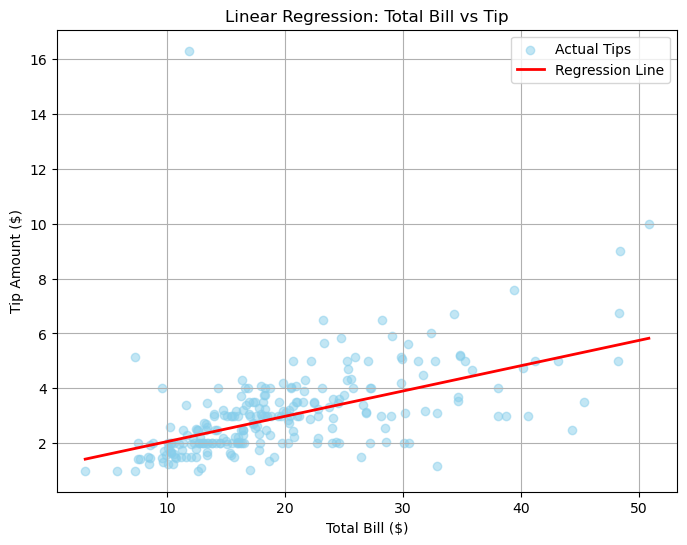

In [94]:

model = smf.ols('tip ~ total_bill + size + C(time)+ C(day) + C(sex) + C(smoker)', data=df).fit()


plt.figure(figsize=(8, 6))
plt.scatter(df['total_bill'], df['tip'], alpha=0.5, color='skyblue', label='Actual Tips')


X_pred = df.copy()
X_pred['size'] = df['size'].mean()
X_pred['time'] = df['time'].mode()[0]
X_pred['day'] = df['day'].mode()[0]
X_pred['sex'] = df['sex'].mode()[0]
X_pred['smoker'] = df['smoker'].mode()[0]

X_pred = X_pred.sort_values(by='total_bill')
y_pred = model.predict(X_pred)


plt.plot(X_pred['total_bill'], y_pred, color='red', linewidth=2, label='Regression Line')


plt.title('Linear Regression: Total Bill vs Tip')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip Amount ($)')
plt.legend()
plt.grid(True)
plt.show()

By size:
 size
1    21.729202
2    16.571919
3    15.215685
4    14.594901
5    14.149549
6    15.622920
Name: tip_pct, dtype: float64 

By time:
 time
Lunch     16.412793
Dinner    15.951779
Name: tip_pct, dtype: float64 

By day:
 day
Thur    16.127563
Fri     16.991303
Sat     15.315172
Sun     16.689729
Name: tip_pct, dtype: float64 

By sex:
 sex
Male      15.765055
Female    16.649074
Name: tip_pct, dtype: float64 

By smoker:
 smoker
Yes    16.319604
No     15.932846
Name: tip_pct, dtype: float64 



C:\Users\Rinzi\AppData\Local\Temp\ipykernel_19560\1164796210.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("By time:\n", df.groupby('time')['tip_pct'].mean(), "\n")
C:\Users\Rinzi\AppData\Local\Temp\ipykernel_19560\1164796210.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("By day:\n", df.groupby('day')['tip_pct'].mean(), "\n")
C:\Users\Rinzi\AppData\Local\Temp\ipykernel_19560\1164796210.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fu

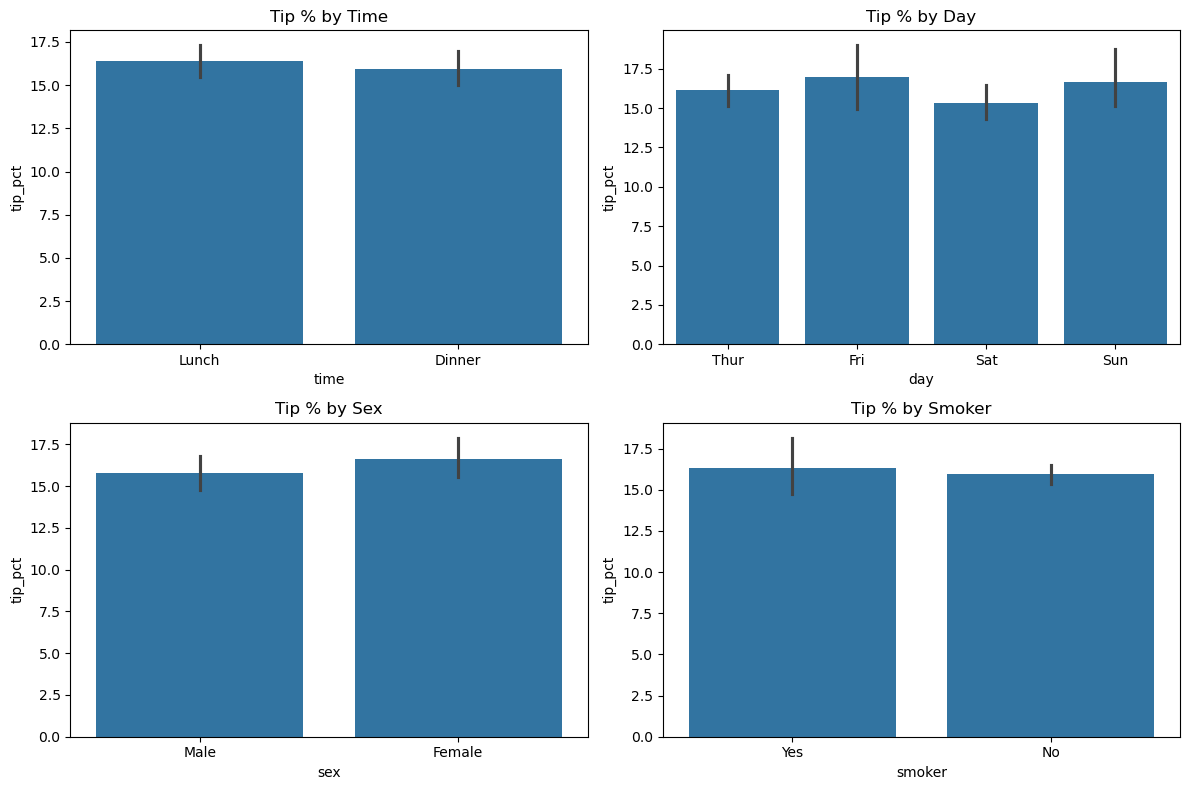

In [95]:
df = sns.load_dataset('tips')
df['tip_pct'] = (df['tip'] / df['total_bill']) * 100


print("By size:\n", df.groupby('size')['tip_pct'].mean(), "\n")
print("By time:\n", df.groupby('time')['tip_pct'].mean(), "\n")
print("By day:\n", df.groupby('day')['tip_pct'].mean(), "\n")
print("By sex:\n", df.groupby('sex')['tip_pct'].mean(), "\n")
print("By smoker:\n", df.groupby('smoker')['tip_pct'].mean(), "\n")


fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.barplot(x='time', y='tip_pct', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Tip % by Time')

sns.barplot(x='day', y='tip_pct', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Tip % by Day')

sns.barplot(x='sex', y='tip_pct', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Tip % by Sex')

sns.barplot(x='smoker', y='tip_pct', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Tip % by Smoker')

plt.tight_layout()
plt.show()

## There is a positive correlation between total bill and tips

In [96]:
df[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [97]:
df['tip_pct'] = ((df['tip'] / df['total_bill']) * 100).round(2).astype(str) + '%'
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94%
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05%
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66%
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98%
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68%


In [98]:
# Tip as a percentage of the bill
df['tip_pct_num'] = (df['tip'] / df['total_bill'] * 100).round(2)


In [99]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_pct_num
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94%,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05%,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66%,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98%,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68%,14.68


In [100]:
print(df['tip_pct_num'])

0       5.94
1      16.05
2      16.66
3      13.98
4      14.68
       ...  
239    20.39
240     7.36
241     8.82
242     9.82
243    15.97
Name: tip_pct_num, Length: 244, dtype: float64


In [101]:
print(df.groupby('size')['tip_pct_num'].mean())

size
1    21.727500
2    16.571410
3    15.214737
4    14.594865
5    14.152000
6    15.620000
Name: tip_pct_num, dtype: float64


In [102]:
print(df.groupby('day')['tip_pct_num'].mean())

day
Thur    16.126452
Fri     16.991579
Sat     15.314598
Sun     16.689605
Name: tip_pct_num, dtype: float64


C:\Users\Rinzi\AppData\Local\Temp\ipykernel_19560\3771714877.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('day')['tip_pct_num'].mean())


In [103]:
print(df.groupby('smoker')['tip_pct_num'].mean())

smoker
Yes    16.319140
No     15.932318
Name: tip_pct_num, dtype: float64


C:\Users\Rinzi\AppData\Local\Temp\ipykernel_19560\625495603.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('smoker')['tip_pct_num'].mean())


In [104]:
print(df[['tip', 'day']])

      tip   day
0    1.01   Sun
1    1.66   Sun
2    3.50   Sun
3    3.31   Sun
4    3.61   Sun
..    ...   ...
239  5.92   Sat
240  2.00   Sat
241  2.00   Sat
242  1.75   Sat
243  3.00  Thur

[244 rows x 2 columns]


C:\Users\Rinzi\AppData\Local\Temp\ipykernel_19560\3887174811.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=days, patch_artist=True)


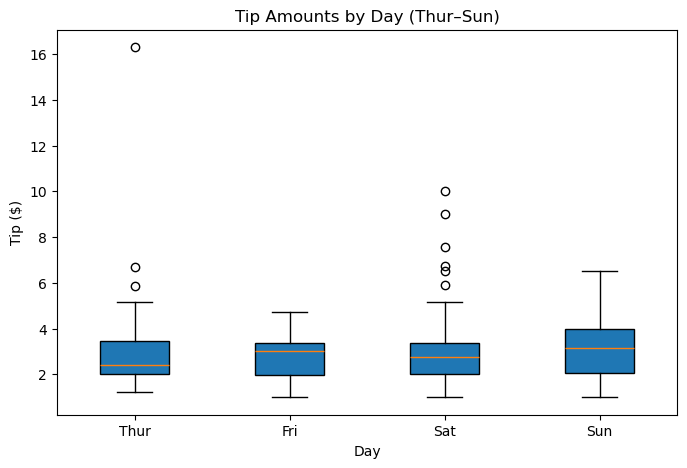

In [105]:
import matplotlib.pyplot as plt


days = ['Thur', 'Fri', 'Sat', 'Sun']
filtered = original_df[original_df['day'].isin(days)]


data = [filtered[filtered['day'] == day]['tip'] for day in days]


plt.figure(figsize=(8, 5))
plt.boxplot(data, labels=days, patch_artist=True)


plt.title('Tip Amounts by Day (Thur–Sun)')
plt.xlabel('Day')
plt.ylabel('Tip ($)')
plt.show()

In [106]:
df['total_cost'] = df['total_bill'] + df['tip']
df['bill_pct'] = (df['total_bill'] / df['total_cost']) * 100

In [107]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_pct_num,total_cost,bill_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94%,5.94,18.00,94.388889
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05%,16.05,12.00,86.166667
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66%,16.66,24.51,85.720114
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98%,13.98,26.99,87.736199
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68%,14.68,28.20,87.198582


## IQR Filtering

## Converting all key columns to numeric & removing missing and non - numeric values

In [108]:
cols_to_clean = ['tip', 'total_bill', 'bill_pct']
df[cols_to_clean] = df[cols_to_clean].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=cols_to_clean)

In [109]:
def IQR_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Tip
lower_tip, upper_tip = IQR_bounds(df['tip'])
print(f"Tip bounds: lower = {lower_tip:.4f}, upper = {upper_tip:.4f}")

# Tip Percentage
lower_pct, upper_pct = IQR_bounds(df['tip_pct_num'])
print(f"Tip % bounds: lower = {lower_pct:.4f}, upper = {upper_pct:.4f}")

# Total Bill
lower_bill, upper_bill = IQR_bounds(df['total_bill'])
print(f"Total Bill bounds: lower = {lower_bill:.4f}, upper = {upper_bill:.4f}")

# Bill Percentage
lower_bill_pct, upper_bill_pct = IQR_bounds(df['bill_pct'])
print(f"Bill % bounds: lower = {lower_bill_pct:.4f}, upper = {upper_bill_pct:.4f}")

Tip bounds: lower = -0.3438, upper = 5.9062
Tip % bounds: lower = 3.5537, upper = 28.5038
Total Bill bounds: lower = -2.8225, upper = 40.2975
Bill % bounds: lower = 76.9779, upper = 95.5156


## Identifying rows that are outliers

In [110]:
outliers_tip = df[(df['tip'] < lower_tip) | (df['tip'] > upper_tip)]
print(outliers_tip)

     total_bill    tip     sex smoker   day    time  size tip_pct  \
23        39.42   7.58    Male     No   Sat  Dinner     4  19.23%   
47        32.40   6.00    Male     No   Sun  Dinner     4  18.52%   
59        48.27   6.73    Male     No   Sat  Dinner     4  13.94%   
141       34.30   6.70    Male     No  Thur   Lunch     6  19.53%   
170       50.81  10.00    Male    Yes   Sat  Dinner     3  19.68%   
183       23.17   6.50    Male    Yes   Sun  Dinner     4  28.05%   
212       48.33   9.00    Male     No   Sat  Dinner     4  18.62%   
214       28.17   6.50  Female    Yes   Sat  Dinner     3  23.07%   
239       29.03   5.92    Male     No   Sat  Dinner     3  20.39%   

     tip_pct_num  total_cost   bill_pct  
23         19.23       47.00  83.872340  
47         18.52       38.40  84.375000  
59         13.94       55.00  87.763636  
141        19.53       41.00  83.658537  
170        19.68       60.81  83.555336  
183        28.05       29.67  78.092349  
212        18.6

## Checking if the outlier 16.3 is successfully removed

In [111]:
print(df[df['tip'] == 16.3])

Empty DataFrame
Columns: [total_bill, tip, sex, smoker, day, time, size, tip_pct, tip_pct_num, total_cost, bill_pct]
Index: []


## Removing the outlier

In [112]:
#df = df[df['tip'] != 16.3]

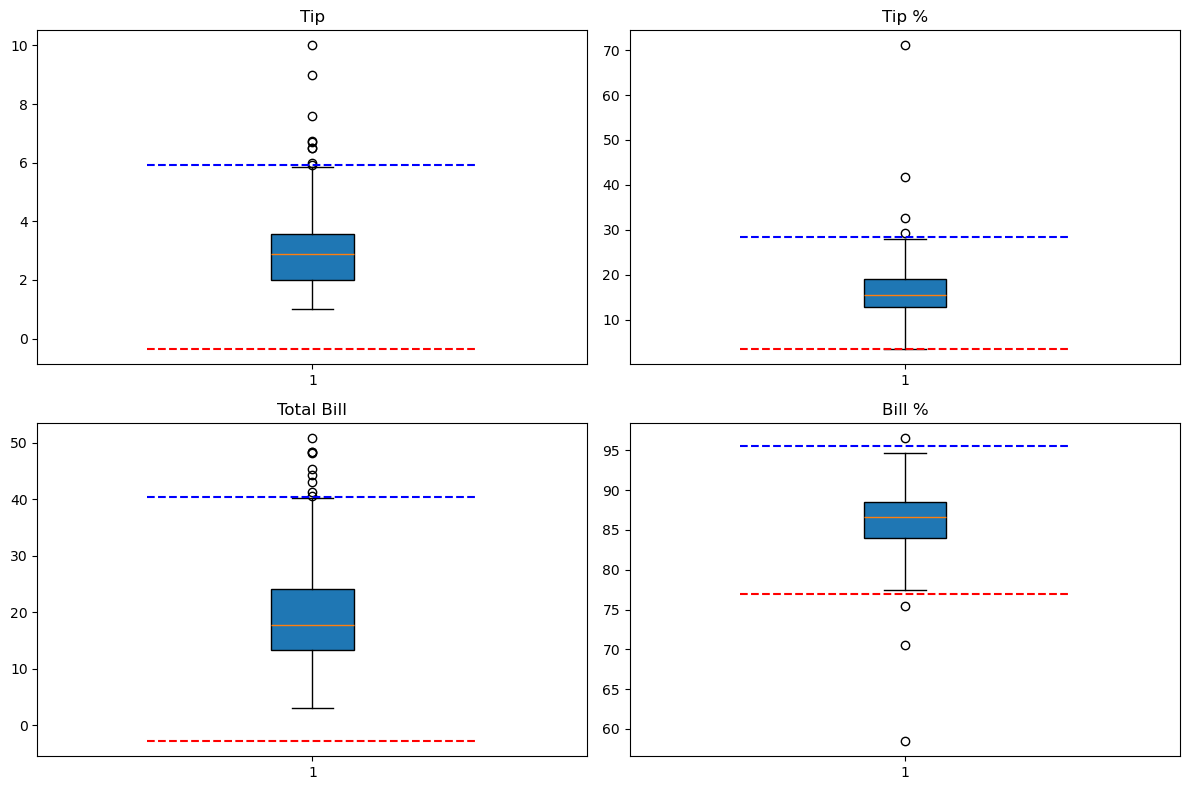

In [113]:
# IQR bounds function
def IQR_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Calculate bounds
lower_tip, upper_tip = IQR_bounds(df['tip'])

lower_bill, upper_bill = IQR_bounds(df['total_bill'])
lower_bill_pct, upper_bill_pct = IQR_bounds(df['bill_pct'])

# Create figure
plt.figure(figsize=(12, 8))

# Tip
plt.subplot(2, 2, 1)
plt.boxplot(df['tip'], patch_artist=True)
plt.title('Tip')
plt.hlines([lower_tip, upper_tip], 0.7, 1.3, colors=['red', 'blue'], linestyles='dashed')

# Tip Percentage

plt.subplot(2, 2, 2)
plt.boxplot(df['tip_pct_num'], patch_artist=True)
plt.title('Tip %')
plt.hlines([lower_pct, upper_pct], 0.7, 1.3, colors=['red', 'blue'], linestyles='dashed')

# Total Bill
plt.subplot(2, 2, 3)
plt.boxplot(df['total_bill'], patch_artist=True)
plt.title('Total Bill')
plt.hlines([lower_bill, upper_bill], 0.7, 1.3, colors=['red', 'blue'], linestyles='dashed')

# Bill %
plt.subplot(2, 2, 4)
plt.boxplot(df['bill_pct'], patch_artist=True)
plt.title('Bill %')
plt.hlines([lower_bill_pct, upper_bill_pct], 0.7, 1.3, colors=['red', 'blue'], linestyles='dashed')

plt.tight_layout()
plt.show()

In [114]:
print(f"Tip bounds: {lower_tip:.2f} to {upper_tip:.2f}")
print(f"Tip % bounds: {lower_pct:.2f} to {upper_pct:.2f}")
print(f"Total bill bounds: {lower_bill:.2f} to {upper_bill:.2f}")
print(f"Bill % bounds: {lower_bill_pct:.2f} to {upper_bill_pct:.2f}")

Tip bounds: -0.34 to 5.91
Tip % bounds: 3.55 to 28.50
Total bill bounds: -2.82 to 40.30
Bill % bounds: 76.98 to 95.52


#The lower bound is negative (unrealistic) so the lower bound will be treated as 0 

#Most tip fall in range from 0 to 5.91. 

#Any tip above $5.91 is considered outlier

#Most Tip Percentage falls between 3.56% to 28.5% Any tip percentage above 28.5% is considered an outlier

#Total bill > $40.30 and Bill& > 95.52% are also considered outliers

<div style="background-color:#e0f7fa; padding:10px; border-left:5px solid #00796b;">
  <strong> New Section: Outlier-Filtered Analysis</strong>
</div>

## Created a new Data Frame (df_clean) with ouliers removed

In [115]:
cols_to_clean = ['tip', 'tip_pct_num', 'total_bill', 'bill_pct']
df[cols_to_clean] = df[cols_to_clean].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=cols_to_clean)

In [116]:
def IQR_bounds(series):
    series = pd.to_numeric(series, errors='coerce').dropna()
    if series.empty:
        return float('nan'), float('nan')
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

lower_tip, upper_tip = IQR_bounds(df['tip'])
lower_pct, upper_pct = IQR_bounds(df['tip_pct_num'])
lower_bill, upper_bill = IQR_bounds(df['total_bill'])
lower_bill_pct, upper_bill_pct = IQR_bounds(df['bill_pct'])

In [117]:
df_clean = df[
    (df['tip'] >= lower_tip) & (df['tip'] <= upper_tip) &
    (df['tip_pct_num'] >= lower_pct) & (df['tip_pct_num'] <= upper_pct) &
    (df['total_bill'] >= lower_bill) & (df['total_bill'] <= upper_bill) &
    (df['bill_pct'] >= lower_bill_pct) & (df['bill_pct'] <= upper_bill_pct)
]

In [118]:
df_clean.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_pct_num,total_cost,bill_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94%,5.94,18.00,94.388889
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05%,16.05,12.00,86.166667
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66%,16.66,24.51,85.720114
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98%,13.98,26.99,87.736199
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68%,14.68,28.20,87.198582


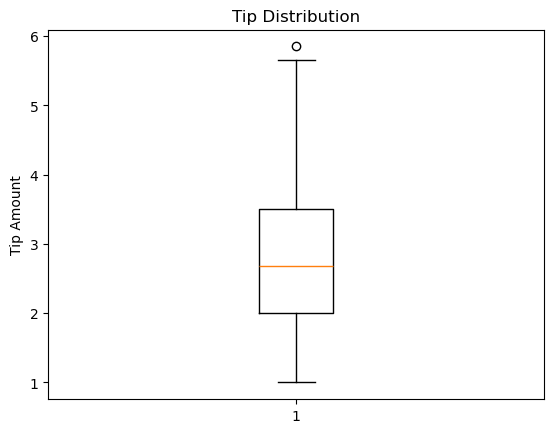

In [119]:
import matplotlib.pyplot as plt

plt.boxplot(df_clean['tip'])
plt.title('Tip Distribution')
plt.ylabel('Tip Amount')
plt.show()

##  Extreme cases (outliers- rows that are removed from df)

In [120]:
outliers = df[~df.index.isin(df_clean.index)]
print(outliers[['total_bill', 'tip', 'tip_pct', 'bill_pct']])

     total_bill    tip tip_pct   bill_pct
23        39.42   7.58  19.23%  83.872340
47        32.40   6.00  18.52%  84.375000
59        48.27   6.73  13.94%  87.763636
67         3.07   1.00  32.57%  75.429975
102       44.30   2.50   5.64%  94.658120
141       34.30   6.70  19.53%  83.658537
142       41.19   5.00  12.14%  89.175146
156       48.17   5.00  10.38%  90.596201
170       50.81  10.00  19.68%  83.555336
172        7.25   5.15  71.03%  58.467742
178        9.60   4.00  41.67%  70.588235
182       45.35   3.50   7.72%  92.835210
183       23.17   6.50  28.05%  78.092349
184       40.55   3.00    7.4%  93.111366
197       43.11   5.00   11.6%  89.607150
212       48.33   9.00  18.62%  84.301413
214       28.17   6.50  23.07%  81.251803
232       11.61   3.39   29.2%  77.400000
237       32.83   1.17   3.56%  96.558824
239       29.03   5.92  20.39%  83.061516


In [121]:
print(f"Original rows: {len(df)}")
print(f"Cleaned rows: {len(df_clean)}")
print(f"Rows removed: {len(df) - len(df_clean)}")

Original rows: 244
Cleaned rows: 224
Rows removed: 20


In [122]:
df_clean.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_pct_num,total_cost,bill_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94%,5.94,18.00,94.388889
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05%,16.05,12.00,86.166667
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66%,16.66,24.51,85.720114
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98%,13.98,26.99,87.736199
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68%,14.68,28.20,87.198582


In [123]:
df_clean.describe()

,total_bill,tip,size,tip_pct_num,total_cost,bill_pct
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,18.601964,2.803304,2.500000,15.667500,21.405268,86.574502
std,7.075085,1.070010,0.878237,4.321593,7.820365,3.233950
min,5.750000,1.000000,1.000000,5.680000,6.750000,78.154014
25%,13.277500,2.000000,2.000000,13.027500,15.317500,84.273472
50%,17.300000,2.675000,2.000000,15.380000,20.110000,86.666667
75%,22.690000,3.500000,3.000000,18.657500,25.992500,88.472941
max,40.170000,5.850000,6.000000,27.950000,44.900000,94.625582


In [124]:
df_clean = pd.DataFrame()  # start empty

for gender in ['Male', 'Female']:
    subset = df[df['sex'] == gender]  # use raw df, not df_clean
    lower_tip, upper_tip = IQR_bounds(subset['tip'])
    lower_pct, upper_pct = IQR_bounds(subset['tip_pct_num'])
    lower_bill, upper_bill = IQR_bounds(subset['total_bill'])
    lower_bill_pct, upper_bill_pct = IQR_bounds(subset['bill_pct'])

    filtered = subset[
        (subset['tip'] >= lower_tip) & (subset['tip'] <= upper_tip) &
        (subset['tip_pct_num'] >= lower_pct) & (subset['tip_pct_num'] <= upper_pct) &
        (subset['total_bill'] >= lower_bill) & (subset['total_bill'] <= upper_bill) &
        (subset['bill_pct'] >= lower_bill_pct) & (subset['bill_pct'] <= upper_bill_pct)
    ]

    df_clean = pd.concat([df_clean, filtered])
    

In [125]:
for gender in ['Male', 'Female']:
    subset = df_clean[df_clean['sex'] == gender]
    lower_tip, upper_tip = IQR_bounds(subset['tip'])
    print(f"{gender} Tip bounds: lower = {lower_tip:.2f}, upper = {upper_tip:.2f}")

Male Tip bounds: lower = -0.25, upper = 5.75
Female Tip bounds: lower = 0.14, upper = 5.10


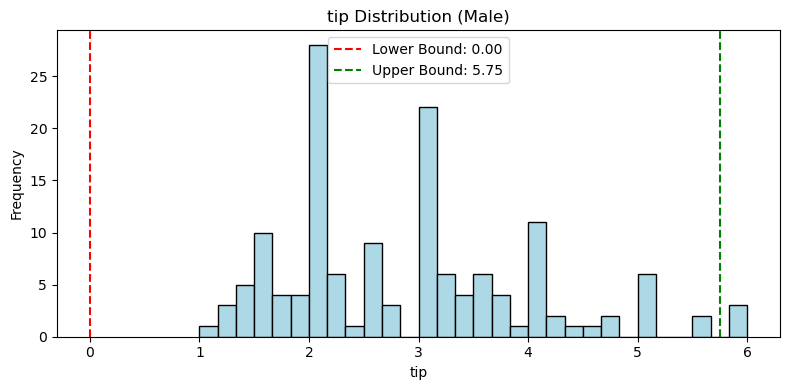

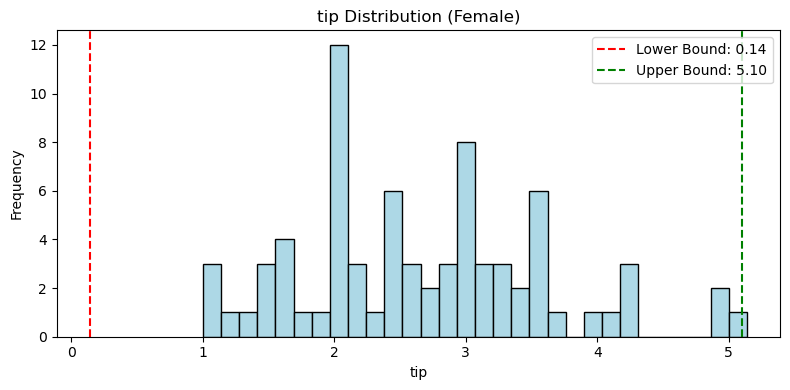

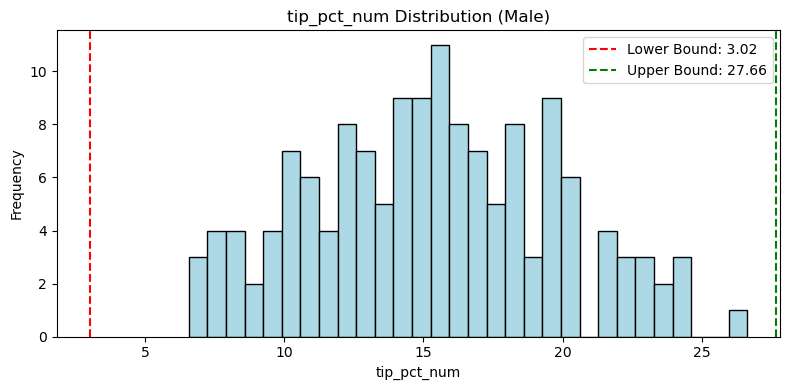

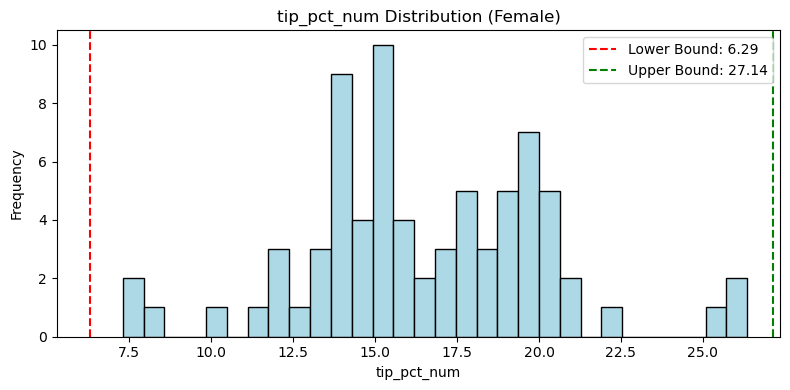

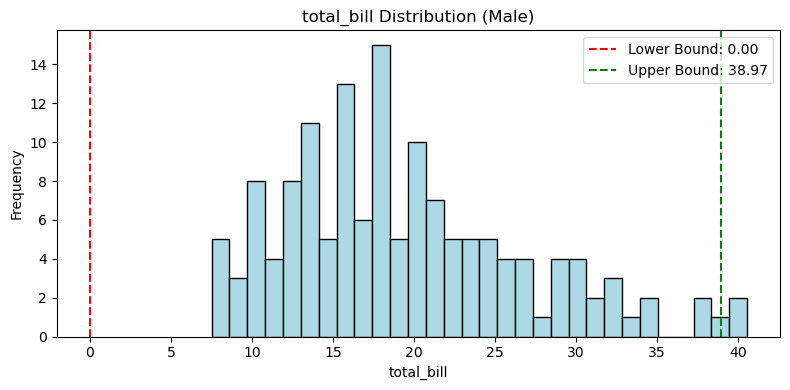

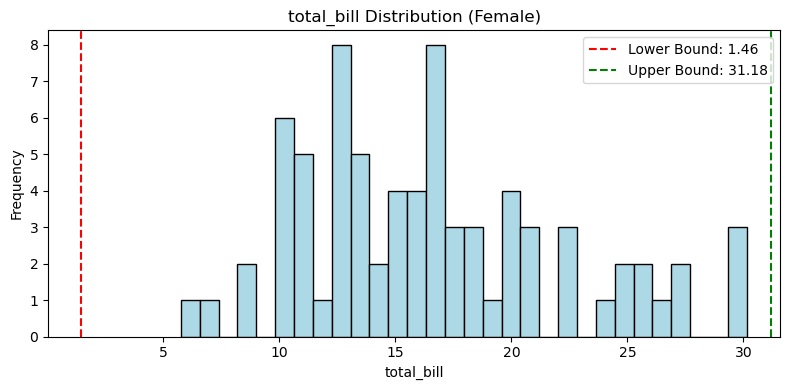

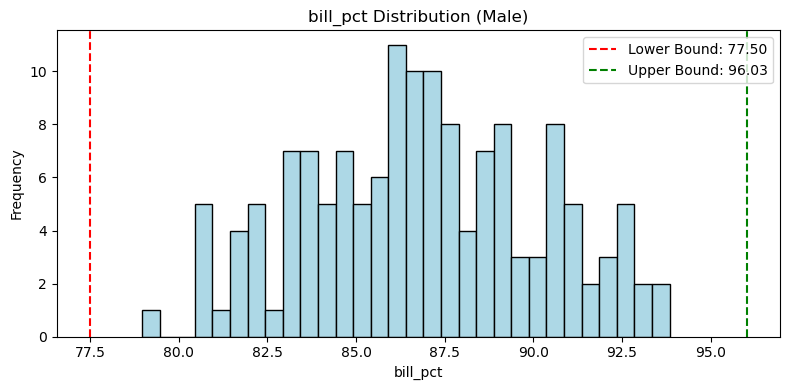

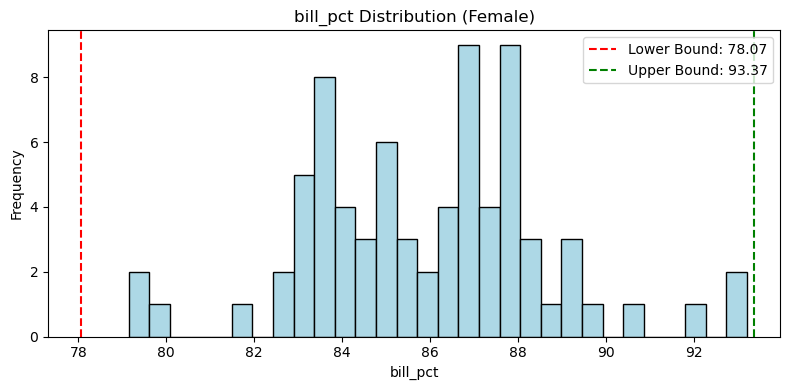

In [126]:

def plot_iqr_hist(df, column, gender):
    data = df_clean[df_clean['sex'] == gender][column]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = max(0, Q1 - 1.5 * IQR)
    upper = Q3 + 1.5 * IQR

    plt.figure(figsize=(8, 4))
    plt.hist(data, bins=30, color='lightblue', edgecolor='black')
    plt.axvline(lower, color='red', linestyle='--', label=f'Lower Bound: {lower:.2f}')
    plt.axvline(upper, color='green', linestyle='--', label=f'Upper Bound: {upper:.2f}')
    plt.title(f'{column} Distribution ({gender})')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()


columns = ['tip', 'tip_pct_num', 'total_bill', 'bill_pct']
genders = ['Male', 'Female']

for col in columns:
    for gender in genders:
        plot_iqr_hist(df, col, gender)

In [127]:
df_clean.head(15)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_pct_num,total_cost,bill_pct
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05%,16.05,12.00,86.166667
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66%,16.66,24.51,85.720114
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98%,13.98,26.99,87.736199
5,25.29,4.71,Male,No,Sun,Dinner,4,18.62%,18.62,30.00,84.300000
6,8.77,2.00,Male,No,Sun,Dinner,2,22.81%,22.81,10.77,81.429898
7,26.88,3.12,Male,No,Sun,Dinner,4,11.61%,11.61,30.00,89.600000
8,15.04,1.96,Male,No,Sun,Dinner,2,13.03%,13.03,17.00,88.470588
9,14.78,3.23,Male,No,Sun,Dinner,2,21.85%,21.85,18.01,82.065519
10,10.27,1.71,Male,No,Sun,Dinner,2,16.65%,16.65,11.98,85.726210
12,15.42,1.57,Male,No,Sun,Dinner,2,10.18%,10.18,16.99,90.759270


In [128]:
df_clean.isna().sum()

total_bill     0
tip            0
sex            0
smoker         0
day            0
time           0
size           0
tip_pct        0
tip_pct_num    0
total_cost     0
bill_pct       0
dtype: int64

In [129]:
df_clean.isna().sum().sum()

0

In [130]:
df_clean.isna().sum(axis=1)

1      0
2      0
3      0
5      0
6      0
      ..
225    0
226    0
229    0
240    0
243    0
Length: 220, dtype: int64

<div style="background-color:#e0f7fa; padding:10px; border-left:5px solid #00796b;">
  <strong>Tracing and Removing Duplicates, Checking for null values</strong><br>
</div>

df_clean.duplicated().sum()

In [131]:
df_clean[df_clean.duplicated()]

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_pct_num,total_cost,bill_pct
202,13.0,2.0,Female,Yes,Thur,Lunch,2,15.38%,15.38,15.0,86.666667


In [132]:
df_clean= df_clean.drop_duplicates()

In [133]:
df_clean.duplicated().sum()

0

In [134]:
df_clean.isnull().sum()

total_bill     0
tip            0
sex            0
smoker         0
day            0
time           0
size           0
tip_pct        0
tip_pct_num    0
total_cost     0
bill_pct       0
dtype: int64

In [135]:
df_clean.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_pct_num,total_cost,bill_pct
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05%,16.05,12.00,86.166667
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66%,16.66,24.51,85.720114
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98%,13.98,26.99,87.736199
5,25.29,4.71,Male,No,Sun,Dinner,4,18.62%,18.62,30.00,84.300000
6,8.77,2.00,Male,No,Sun,Dinner,2,22.81%,22.81,10.77,81.429898


In [136]:
df_clean.shape[0]

219

In [137]:
df_clean.groupby('sex')['tip'].mean()

C:\Users\Rinzi\AppData\Local\Temp\ipykernel_19560\3736563331.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby('sex')['tip'].mean()


sex
Male      2.864483
Female    2.688649
Name: tip, dtype: float64

In [138]:
df_clean.groupby('smoker')['tip'].mean()

C:\Users\Rinzi\AppData\Local\Temp\ipykernel_19560\575369911.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby('smoker')['tip'].mean()


smoker
Yes    2.820864
No     2.795797
Name: tip, dtype: float64

## created sub filter clean_male

In [139]:
clean_male = df_clean[df_clean['sex'] == 'Male'] 
clean_male.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_pct_num,total_cost,bill_pct
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05%,16.05,12.00,86.166667
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66%,16.66,24.51,85.720114
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98%,13.98,26.99,87.736199
5,25.29,4.71,Male,No,Sun,Dinner,4,18.62%,18.62,30.00,84.300000
6,8.77,2.00,Male,No,Sun,Dinner,2,22.81%,22.81,10.77,81.429898


## Tip Rate by Gender (Male)

In [140]:
clean_mtip_rate = (clean_male['tip'].sum()/clean_male['total_bill'].sum()*100)
print(f"Male server got tipped an average of {clean_mtip_rate:.2f}% of their total bill.")

Male server got tipped an average of 14.70% of their total bill.


## Created sub filter lunch_time to filter meal by lunch for male

In [141]:
clean_mlunch = clean_male[clean_male['time'] == 'Lunch']

In [142]:
clean_mlunch.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_pct_num,total_cost,bill_pct
77,27.20,4.00,Male,No,Thur,Lunch,4,14.71%,14.71,31.20,87.179487
78,22.76,3.00,Male,No,Thur,Lunch,2,13.18%,13.18,25.76,88.354037
79,17.29,2.71,Male,No,Thur,Lunch,2,15.67%,15.67,20.00,86.450000
80,19.44,3.00,Male,Yes,Thur,Lunch,2,15.43%,15.43,22.44,86.631016
81,16.66,3.40,Male,No,Thur,Lunch,2,20.41%,20.41,20.06,83.050847


## Tip rate categorized by lunch for male

In [143]:
clean_mtip_pcent = clean_mlunch['tip'].sum()/clean_mlunch['total_bill'].sum()*100
print(f'Male percentage tip for lunch is {clean_mtip_pcent:.2f}%')

Male percentage tip for lunch is 16.04%


## Maximum, Minimum & Average Bill per lunch for male

In [144]:
print('Maximum lunch bill as per male server:',clean_mlunch['total_bill'].max())
print('Minimum lunch bill as per male server:',clean_mlunch['total_bill'].min())
print('Average lunch bill as per male server:',clean_mlunch['total_bill'].mean())

Maximum lunch bill as per male server: 32.68
Minimum lunch bill as per male server: 7.51
Average lunch bill as per male server: 16.777741935483867


## Maximum & Minimum & Average Tip as per lunch

In [145]:
print('Maximum lunch tip as per male server:',clean_mlunch['tip'].max())
print('Minimum lunch tip as per male server:',clean_mlunch['tip'].min())
print('Average lunch tip as per male server:',clean_mlunch['total_bill'].mean())

Maximum lunch tip as per male server: 5.85
Minimum lunch tip as per male server: 1.44
Average lunch tip as per male server: 16.777741935483867


## Created sub filter lunch_time to filter meal by Dinner for male

In [146]:
clean_mdinner = clean_male[clean_male['time'] == 'Dinner']
clean_mdinner.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_pct_num,total_cost,bill_pct
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05%,16.05,12.00,86.166667
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66%,16.66,24.51,85.720114
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98%,13.98,26.99,87.736199
5,25.29,4.71,Male,No,Sun,Dinner,4,18.62%,18.62,30.00,84.300000
6,8.77,2.00,Male,No,Sun,Dinner,2,22.81%,22.81,10.77,81.429898


## Tip rate for lunch categorized by Dinner for male

In [147]:
clean_mlun_pcent = clean_mdinner['tip'].sum()/clean_mdinner['total_bill'].sum()*100
print(f'Male percentage tip for dinner is {clean_mlun_pcent:.2f}%')

Male percentage tip for dinner is 14.39%


## Maximum, Minimum & Average Bill per dinner for male

In [148]:
print('Maximum dinner bill as per male server:',clean_mdinner['total_bill'].max())
print('Minimum dinner bill as per male server:',clean_mdinner['total_bill'].min())
print('Average dinner bill as per male server:',clean_mdinner['total_bill'].mean())

Maximum dinner bill as per male server: 40.55
Minimum dinner bill as per male server: 7.74
Average dinner bill as per male server: 20.22815789473684


## Maximum & Minimum & Average Tip per dinner for male

In [149]:
print('Maximum dinner tip as per male server:',clean_mdinner['tip'].max())
print('Minimum dinner tip as per male server:',clean_mdinner['tip'].min())
print('Average dinner tip as per male server:',clean_mdinner['tip'].mean())

Maximum dinner tip as per male server: 6.0
Minimum dinner tip as per male server: 1.0
Average dinner tip as per male server: 2.911754385964912


## Created a subfilter (clean_female)

In [150]:
clean_female = df_clean[df_clean['sex'] =='Female']
clean_female.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_pct_num,total_cost,bill_pct
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68%,14.68,28.20,87.198582
14,14.83,3.02,Female,No,Sun,Dinner,2,20.36%,20.36,17.85,83.081232
16,10.33,1.67,Female,No,Sun,Dinner,3,16.17%,16.17,12.00,86.083333
18,16.97,3.50,Female,No,Sun,Dinner,3,20.62%,20.62,20.47,82.901808
21,20.29,2.75,Female,No,Sat,Dinner,2,13.55%,13.55,23.04,88.064236


## Tip Rate by Gender (Female)

In [151]:
clean_ftip_rate = clean_female['tip'].sum()/clean_female['total_bill'].sum() * 100
print(f"female server got tipped an average of {clean_ftip_rate:.2f}% of their total bill.")

female server got tipped an average of 16.16% of their total bill.


## created a subfilter for female lunch (clean_flunch)

In [152]:
clean_flunch = clean_female[clean_female['time'] == 'Lunch'] 

## Tip rate categorized by lunch for female

In [153]:
clean_flun_rate = clean_flunch['tip'].sum()/clean_flunch['total_bill'].sum()*100
print(f"female server during lunch got tipped an average of {clean_flun_rate:.2f}% of their total bill.")

female server during lunch got tipped an average of 16.27% of their total bill.


## Maximum, Minimum & Average Bill per lunch for female

In [154]:
print('Maximum lunch bill as per female server:',clean_flunch['total_bill'].max())
print('Minimum lunch bill as per female server:',clean_flunch['total_bill'].min())
print('Average lunch bill as per female server:',clean_flunch['total_bill'].mean())

Maximum lunch bill as per female server: 29.8
Minimum lunch bill as per female server: 8.35
Average lunch bill as per female server: 15.029062500000002


## Maximum, Minimum & Average tip per lunch for female

In [155]:
print('Maximum dinner tip as per female server:',clean_flunch['tip'].max())
print('Minimum dinner tip as per female server:',clean_flunch['tip'].min())
print('Average dinner tip as per female server:',clean_flunch['tip'].mean())

Maximum dinner tip as per female server: 5.0
Minimum dinner tip as per female server: 1.25
Average dinner tip as per female server: 2.4446875


## created a subfilter for female dinner(clean_fdinner)

In [156]:
clean_fdinner = clean_female[clean_female['time'] == 'Dinner']

In [157]:
clean_fdinner.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_pct_num,total_cost,bill_pct
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68%,14.68,28.20,87.198582
14,14.83,3.02,Female,No,Sun,Dinner,2,20.36%,20.36,17.85,83.081232
16,10.33,1.67,Female,No,Sun,Dinner,3,16.17%,16.17,12.00,86.083333
18,16.97,3.50,Female,No,Sun,Dinner,3,20.62%,20.62,20.47,82.901808
21,20.29,2.75,Female,No,Sat,Dinner,2,13.55%,13.55,23.04,88.064236


## Tip rate categorized by dinner for female

In [158]:
clean_fdin_pcent = clean_fdinner['tip'].sum()/clean_fdinner['total_bill'].sum()*100
print(f"female server during dinner got tipped an average of {clean_fdin_pcent:.2f}% of their total bill.")

female server during dinner got tipped an average of 16.09% of their total bill.


## Maximum, Minimum & Average Bill per dinner for female

In [159]:
print('Maximum dinner bill as per female server:',clean_fdinner['total_bill'].max())
print('Minimum dinner bill as per female server:',clean_fdinner['total_bill'].min())
print('Average dinner bill as per female server:',clean_fdinner['total_bill'].mean())

Maximum dinner bill as per female server: 30.14
Minimum dinner bill as per female server: 5.75
Average dinner bill as per female server: 17.865000000000002


## Maximum, Minimum & Average tip per lunch for female

In [160]:
print('Maximum dinner tip as per female server:',clean_fdinner['tip'].max())
print('Minimum dinner tip as per female server:',clean_fdinner['tip'].min())
print('Average dinner tip as per female server:',clean_fdinner['tip'].mean())

Maximum dinner tip as per female server: 5.14
Minimum dinner tip as per female server: 1.0
Average dinner tip as per female server: 2.8745238095238097


## Regression analysis with filtered data df_clean

In [161]:
#Regression analysis
model = smf.ols('tip ~ total_bill + size + C(time)+ C(day) + C(sex) + C(smoker)', data=df_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     20.15
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           1.84e-22
Time:                        18:49:31   Log-Likelihood:                -262.28
No. Observations:                 219   AIC:                             542.6
Df Residuals:                     210   BIC:                             573.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6828      0.23

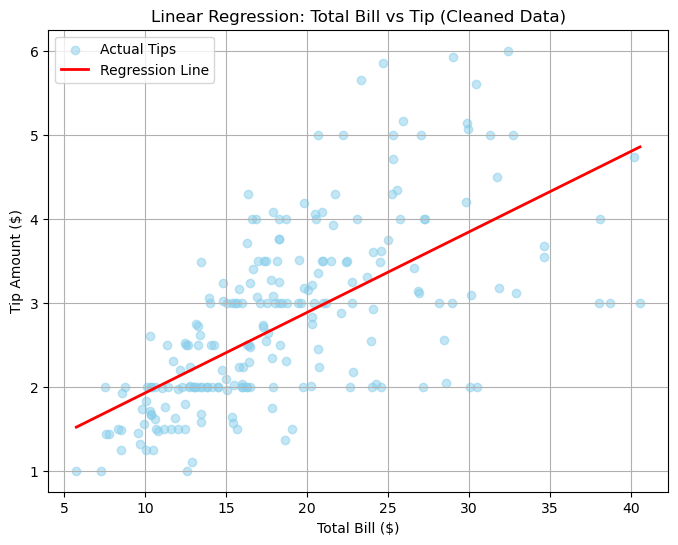

In [162]:
model_clean = smf.ols('tip ~ total_bill + size + C(time)+ C(day) + C(sex) + C(smoker)', data=df_clean).fit()
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['total_bill'], df_clean['tip'], alpha=0.5, color='skyblue', label='Actual Tips')
X_pred_clean = df_clean.copy()
X_pred_clean['size'] = df_clean['size'].mean()
X_pred_clean['time'] = df_clean['time'].mode()[0]
X_pred_clean['day'] = df_clean['day'].mode()[0]
X_pred_clean['sex'] = df_clean['sex'].mode()[0]
X_pred_clean['smoker'] = df_clean['smoker'].mode()[0]
X_pred_clean = X_pred_clean.sort_values(by='total_bill')
y_pred_clean = model_clean.predict(X_pred_clean)
plt.plot(X_pred_clean['total_bill'], y_pred_clean, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Total Bill vs Tip (Cleaned Data)')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip Amount ($)')
plt.legend()
plt.grid(True)
plt.show()


In [163]:
df_clean[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.644724
tip,0.644724,1.000000


In [164]:
# Filter small and large groups from cleaned data
group_small = df_clean[df_clean['size'] <= 2]
group_large = df_clean[df_clean['size'] > 2]

# Calculate tip percentages
tip_pct_small = group_small['tip'].sum() / group_small['total_bill'].sum() * 100
tip_pct_large = group_large['tip'].sum() / group_large['total_bill'].sum() * 100

# Print results
print(f'Small group tip percentage is {tip_pct_small:.2f}%')
print(f'Large group tip percentage is {tip_pct_large:.2f}%')

Small group tip percentage is 15.67%
Large group tip percentage is 14.33%


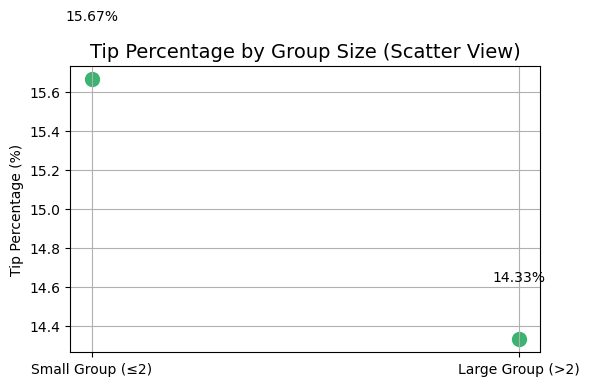

In [165]:
group_labels = ['Small Group (≤2)', 'Large Group (>2)']
tip_percentages = [15.67, 14.33]
x_values = [1, 2]  
plt.figure(figsize=(6, 4))
plt.scatter(x_values, tip_percentages, color='mediumseagreen', s=100)
for i, txt in enumerate(tip_percentages):
    plt.text(x_values[i], tip_percentages[i] + 0.3, f'{txt:.2f}%', ha='center')
plt.xticks(x_values, group_labels)
plt.title('Tip Percentage by Group Size (Scatter View)', fontsize=14)
plt.ylabel('Tip Percentage (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [166]:
df_clean[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.644724
tip,0.644724,1.000000


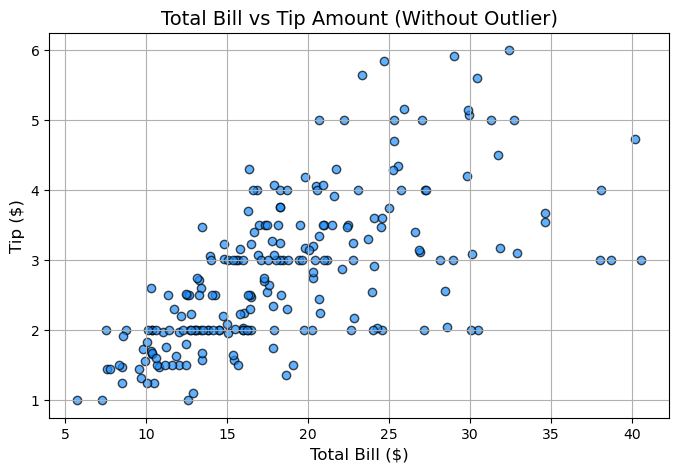

In [167]:
plt.figure(figsize=(8, 5))
plt.scatter(df_clean['total_bill'], df_clean['tip'], alpha=0.7, color='dodgerblue', edgecolors='black')
plt.title('Total Bill vs Tip Amount (Without Outlier)', fontsize=14)
plt.xlabel('Total Bill ($)', fontsize=12)
plt.ylabel('Tip ($)', fontsize=12)
plt.grid(True)
plt.show()

In [168]:
# Filter smoker and non-smoker groups from cleaned data
group_smoker = df_clean[df_clean['smoker'] == 'Yes']
group_non_smoker = df_clean[df_clean['smoker'] == 'No']

# Calculate tip percentages
tip_rate_smoker = group_smoker['tip'].sum() / group_smoker['total_bill'].sum() * 100
tip_rate_non_smoker = group_non_smoker['tip'].sum() / group_non_smoker['total_bill'].sum() * 100

# Print results
print(f'Smoker tip rate is: {tip_rate_smoker:.2f}%')
print(f'Non-smoker tip rate is: {tip_rate_non_smoker:.2f}%')

Smoker tip rate is: 14.14%
Non-smoker tip rate is: 15.80%


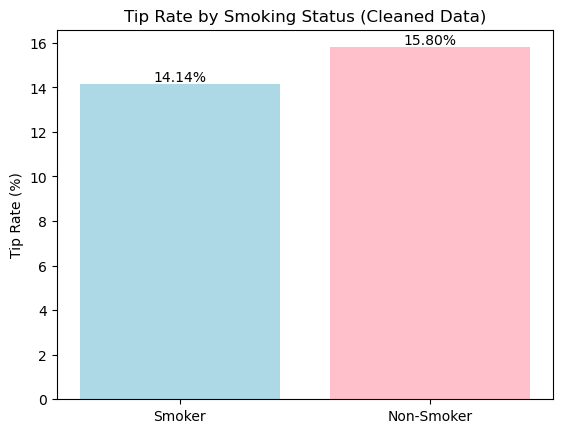

In [169]:
import matplotlib.pyplot as plt
group_smoker_clean = df_clean[df_clean['smoker'] == 'Yes']
group_non_smoker_clean = df_clean[df_clean['smoker'] == 'No']
tip_rate_smoker_clean = group_smoker_clean['tip'].sum() / group_smoker_clean['total_bill'].sum() * 100
tip_rate_non_smoker_clean = group_non_smoker_clean['tip'].sum() / group_non_smoker_clean['total_bill'].sum() * 100
labels = ['Smoker', 'Non-Smoker']
tip_rates = [tip_rate_smoker_clean, tip_rate_non_smoker_clean]
bars = plt.bar(labels, tip_rates, color=['lightblue', 'pink'])
plt.title('Tip Rate by Smoking Status (Cleaned Data)')
plt.ylabel('Tip Rate (%)')
plt.bar_label(bars, fmt='%.2f%%', label_type='edge')
plt.show()

In [170]:
clean_lunch = df_clean[df_clean['time'] == 'Lunch']
clean_dinner = df_clean[df_clean['time'] == 'Dinner']
lunch_tip_pct = clean_lunch['tip'].sum() / clean_lunch['total_bill'].sum() * 100
dinner_tip_pct = clean_dinner['tip'].sum() / clean_dinner['total_bill'].sum() * 100
print(f'Lunch tip rate (cleaned data): {lunch_tip_pct:.2f}%')
print(f'Dinner tip rate (cleaned data): {dinner_tip_pct:.2f}%')

Lunch tip rate (cleaned data): 16.15%
Dinner tip rate (cleaned data): 14.81%


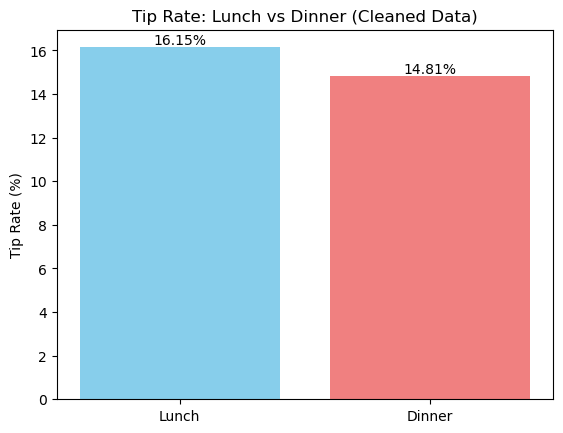

In [171]:
import matplotlib.pyplot as plt

# Filter lunch and dinner groups from cleaned data
clean_lunch_group = df_clean[df_clean['time'] == 'Lunch']
clean_dinner_group = df_clean[df_clean['time'] == 'Dinner']

# Calculate tip percentages
clean_lunch_rate = clean_lunch_group['tip'].sum() / clean_lunch_group['total_bill'].sum() * 100
clean_dinner_rate = clean_dinner_group['tip'].sum() / clean_dinner_group['total_bill'].sum() * 100

# Prepare data
labels = ['Lunch', 'Dinner']
tip_rates = [clean_lunch_rate, clean_dinner_rate]

# Plot
bars = plt.bar(labels, tip_rates, color=['skyblue', 'lightcoral'])
plt.title('Tip Rate: Lunch vs Dinner (Cleaned Data)')
plt.ylabel('Tip Rate (%)')

# Add percentage labels
plt.bar_label(bars, fmt='%.2f%%', label_type='edge')

plt.show()

In [172]:
clean_male_group = df_clean[df_clean['sex'] == 'Male']
clean_female_group = df_clean[df_clean['sex'] == 'Female']
clean_male_tip_rate = clean_male_group['tip'].sum() / clean_male_group['total_bill'].sum() * 100
clean_female_tip_rate = clean_female_group['tip'].sum() / clean_female_group['total_bill'].sum() * 100

print(f'Male Tip Rate (cleaned data): {clean_male_tip_rate:.2f}%')
print(f'Female Tip Rate (cleaned data): {clean_female_tip_rate:.2f}%')

Male Tip Rate (cleaned data): 14.70%
Female Tip Rate (cleaned data): 16.16%


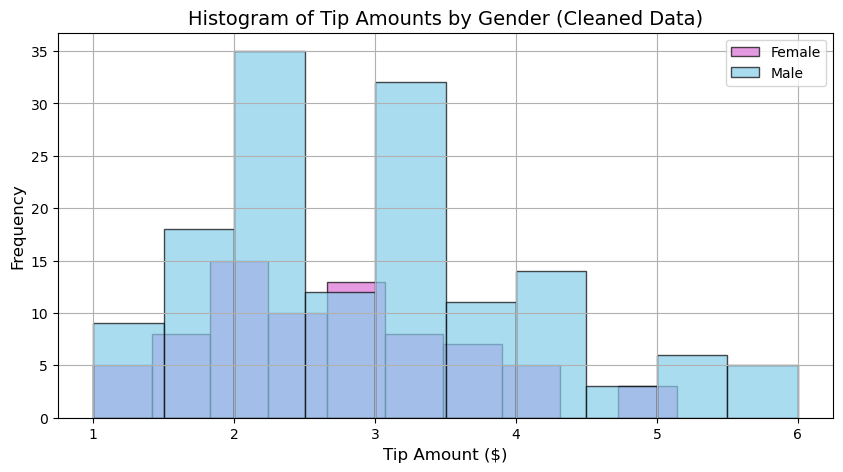

In [173]:
clean_male_group = df_clean[df_clean['sex'] == 'Male']
clean_female_group = df_clean[df_clean['sex'] == 'Female']
plt.figure(figsize=(10, 5))
plt.hist(clean_female_group['tip'], bins=10, alpha=0.7, color='orchid',
         edgecolor='black', label='Female')
plt.hist(clean_male_group['tip'], bins=10, alpha=0.7, color='skyblue',
         edgecolor='black', label='Male')
plt.title('Histogram of Tip Amounts by Gender (Cleaned Data)', fontsize=14)
plt.xlabel('Tip Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()